### Prerequisites
Have anaconda installed


### Random Play in Atari Environments

Import GYM and create an environment for a specific environment.

We initialize the environment to an initial state with env.reset()

Each observation returns a reward change from a specific observation(frame), usually +-1, 0 or 1. We sum the rerwards received throughout the game and store in game_score. We want to maximise this score.


Next we create a loop which will be used to allow the agent to interact with the environemnt.
env.action_space.sample() selects a random action from environments action space.
env.step(action) executes the action and observes the environment. The observation is stored in  observation, reward, done, info.

In the case of atari games:

observation is a (210, 160, 3) shape which represents atari screen which is 210 x 160 pixels RGB

reward - reward for a specific action-observation

done - whether the state was terminal

We can then render the new state of the environment on the screen with env.render(). Note this runs as fast as possible, it can achieve 500+ fps, making it impossible for a human eye to observe in detail whats happening. To slow down the rendering use sleep(0.033). Note, if action selection would require more computation this would slow down the execution as well.

Finally, we sum the revard achieved at this observation, and check whether episode is terminal.

Note, even though we run the simulation 1 million times, it finishes much sooner depending on the game, e.g. after 100 steps,  since this is how for many frames our agent can play before reaching the terminal state. The loop terminates when the agent reaches terminal state. Often agent is capped to X number of frames to prevent degenerate startegies, e.g. Tennis, where agent can learn a strategy of not serving the ball in order to maximise its score, which would cause the game to never terminate. [source]

The console outputs Number of steps taken by the agent before the terminal state, score, and fps.

In [1]:
import gym
import time
start = time.time()

env = gym.make("Pong-v0")

observation = env.reset()
start = time.time()
game_score = 0;

for steps in range(int(1e6)):
    action = env.action_space.sample() # your agent here (this takes random actions)
    observation, reward, done, info = env.step(action)

    #env.render()

    game_score += reward
        
    if(done):
        print("No of steps:", steps, "Game score:", game_score, "Finished in:", (time.time() - start), "FPS:", steps / (time.time() - start) )
        break


No of steps: 1150 Game score: -21.0 Finished in: 0.40216565132141113 FPS: 2859.5148111194703


Open AI Gym contains an utility which allows human players to play the game to better understand its mechanics.
You can change the name of the game you wish to play by editing gym.make() argument.
Usually the controlls are WASD and space.

In [3]:
from gym.utils.play import play
env = gym.make('MsPacmanNoFrameskip-v4')
play(env, zoom=3, fps=60)


ModuleNotFoundError: No module named 'pygame'

To print all the availible environments run the code below:

In [4]:
from gym import envs
envids = [spec.id for spec in envs.registry.all()]
print("There are ", len(envids), "configurations of different environments")

for envid in sorted(envids):
    print(envid)

There are  821 configurations of different environments
Acrobot-v1
AirRaid-ram-v0
AirRaid-ram-v4
AirRaid-ramDeterministic-v0
AirRaid-ramDeterministic-v4
AirRaid-ramNoFrameskip-v0
AirRaid-ramNoFrameskip-v4
AirRaid-v0
AirRaid-v4
AirRaidDeterministic-v0
AirRaidDeterministic-v4
AirRaidNoFrameskip-v0
AirRaidNoFrameskip-v4
Alien-ram-v0
Alien-ram-v4
Alien-ramDeterministic-v0
Alien-ramDeterministic-v4
Alien-ramNoFrameskip-v0
Alien-ramNoFrameskip-v4
Alien-v0
Alien-v4
AlienDeterministic-v0
AlienDeterministic-v4
AlienNoFrameskip-v0
AlienNoFrameskip-v4
Amidar-ram-v0
Amidar-ram-v4
Amidar-ramDeterministic-v0
Amidar-ramDeterministic-v4
Amidar-ramNoFrameskip-v0
Amidar-ramNoFrameskip-v4
Amidar-v0
Amidar-v4
AmidarDeterministic-v0
AmidarDeterministic-v4
AmidarNoFrameskip-v0
AmidarNoFrameskip-v4
Ant-v2
Ant-v3
Assault-ram-v0
Assault-ram-v4
Assault-ramDeterministic-v0
Assault-ramDeterministic-v4
Assault-ramNoFrameskip-v0
Assault-ramNoFrameskip-v4
Assault-v0
Assault-v4
AssaultDeterministic-v0
AssaultDetermin

## DQN
The code above creates an agent where agent takes a random action. Instead of using an action at random, we will train a model which will decide what is the best action to take.

#### DQN works as follows:

### Preprocessing

It learns from visual data. Raw atari data frames are 210 x 160 pixel images with 128 colours. To reduce memory and computation requirements the images are preprocessed.
Atari games contain a flickering where some objects appear only in even frames and some only in odd frames, which was due to limited number of Sprites Atari console could display at once.
To encode a single frame take the maximum value for each pixel value over the frame baing encoded and the previous frame. 
Next, the luminance value is extracted from RGB and rescaled to 84 x 84.
This preprocessing is applied to m most recent frames, 4 in case of the orginal paper. The frames are then stacked and fed into the Q-function.

### Q-function approximation

DQN's input is the state representation, in case of atari games 84 x 84 x 4 image, and the output is the Action space, with separate unit for each of the possible action, which in case of Atari games is between 4 and 18 actions.

The architecture is as follows:

Convolutional Neural Network is used
Its input is 4 stacked frames,  unrolled into a 84 x 84 x 4 image produced by the preprocessing step. The first hidden layer convolves 32 filters of 8 x 8 with stride 4 with the input image and applies a rectifier nonlinearity. The second hidden layer convolves 64 filters of 4 x 4 with stride 2, again followed by a rectifier nonlinearity.
This is followed by a third convolutional layer that convolves 64 filters of 3 x 3 with stride 1 followed by a rectifier. The final hidden layer is fully-connected and consists of 512 rectifier units. The output layer is a fully-connected linear layer with asingle output for each valid action. The number of valid actions varied between 4 and 18 on the games we considered.

### Q-Learning
test

# DQN implementation begins here

### Utilities

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

def showFrame(observation):
    plt.imshow(observation)
    plt.show()
    
def initEnvironment(envName='PongDeterministic-v4'):
    env = gym.make(envName)
    env.reset()    
    return env;

### Preprocessing

NOTE: STEP BELOW DOES NOT EXTRACT MAXIMUM PIXEL VALUE FROM CURRENT AND PREVIOUS FRAME TO REMOVE FLICKERING (not implemented yet)

In [32]:
import cv2
def preprocess(observation):
    res = cv2.resize(observation, (84, 84))
    r, g, b = res[:,:,0], res[:,:,1], res[:,:,2]
    lum = 0.2126 * r + 0.7152 * g + 0.0722 * b# extract Relative_luminance
    return lum.astype('float32') / 128 - 1    # normalize, there is a bettwe way I think

Plot one original frame and one after preprocessing tp see how it is affected.

Before processing: (210, 160, 3)


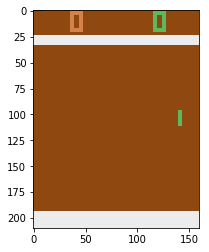

After processing: (84, 84)


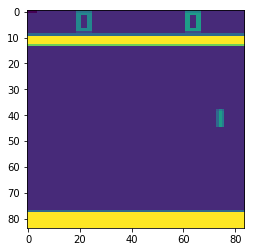

In [40]:
env = initEnvironment()
observation, reward, done, info = env.step(0)

print("Before processing: " + str(np.array(observation).shape))
showFrame(observation)

newObservation = preprocess(observation)
print("After processing: " + str(np.array(newObservation).shape))
showFrame(newObservation)

### Memory

On 50k frames it takes:
Cv2 extract luminance and resize - 0.28 min
Scikit luminance and resize - 0.39 min
Cv2 resize and luminance (cuirrently used)- 0.16 min

In [45]:
import collections
import time

REPLAY_SIZE = 1000000
REPLAY_START_SIZE = 50000
memory = collections.deque(maxlen=REPLAY_SIZE)

env = initEnvironment()

print("Initializing Memory")
start = time.time()

for i in range(REPLAY_START_SIZE):
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    memory.append([preprocess(observation), action, reward])
    
end = time.time()

print("Finished adding ", REPLAY_START_SIZE, " in ",(end - start), " seconds.\n")

Initializing Memory
Finished adding  50000  in  9.820366621017456  seconds.



### CNN

In [46]:
from keras.models import Sequential
from keras.layers import Dense, Convolution2D

actionCount = env.action_space.n

model = Sequential([
    Convolution2D(32, (8, 8), strides=(4,4), activation='relu'),
    Convolution2D(64, (4, 4), strides=(2,2), activation='relu'),
    Convolution2D(64, (3, 3), activation='relu'),
    Dense(units=512, activation='relu'),
    Dense(units=actionCount, activation='linear')
    ])

#How to specify learning rate ??
model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

